<a href="https://colab.research.google.com/github/maxmatical/Machine-Learning/blob/master/Gold_Case_Study_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Required Packages

In [0]:
# Set up environment and download course-v3
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastprogress
!pip install pathlib

In [0]:
 !curl https://course-v3.fast.ai/setup/colab | bash

In [0]:
from fastai import *
from fastai.tabular import *


In [0]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [0]:
# check the directory of the data 
!ls -d $PWD/*

# Loading in Data

using a function to concatenate csvs 

In [0]:
path = '/content/data/'
os.makedirs(path, exist_ok=True)
#path


In [74]:
!ls {path}

 C1_Comdty_t.csv	'GC1 Comdty_t.csv'   us_macro_t.csv
 chicago_weather_t.csv	 models


In [7]:
# check the directory of the data 
!ls -d $PWD/*

/content/course-v3  /content/data  /content/models


In [0]:
table_names = ['C1_Comdty_t', 'GC1 Comdty_t', 'chicago_weather_t', 'us_macro_t']

In [0]:
tables = [pd.read_csv(f'{path}{fname}.csv', low_memory=False) for fname in table_names]


Naming tables

In [0]:
C1 = tables[0]
GC1 = tables[1]
chicago_weather = tables[2]
us_macro = tables[3]


# Exploratory Data Analysis

In [0]:
from IPython.display import HTML, display


In [0]:
! pip install pandas-summary
from pandas_summary import DataFrameSummary


In [0]:
# looking at all data
for t in tables: display(t.head())

In [0]:
# looking at summarized data
for t in tables: display(t.describe(include='all'))

# Data Cleaning and Feature Engineering

creating Month field for all tables

In [0]:
GC1['Month'] = pd.DatetimeIndex(GC1['GC1 Comdty']).month
C1['Month'] = pd.DatetimeIndex(C1['C 1 Comdty']).month
chicago_weather['Month'] = pd.DatetimeIndex(chicago_weather['DATE']).month
us_macro['Month'] = pd.DatetimeIndex(us_macro['date']).month

creating year field for year to join chicago_weather and us_macro

In [0]:
# us_macro['Year'] =  pd.DatetimeIndex(us_macro['date']).year
# chicago_weather['Year'] = pd.DatetimeIndex(chicago_weather['DATE']).year

chicago_weather['Month_Year'] = pd.to_datetime(chicago_weather['DATE']).dt.to_period('M')
us_macro['Month_Year'] = pd.to_datetime(us_macro['date']).dt.to_period('M')


In [0]:
#GC1

Join function to join pandas dataframes

We don't use an inner join because we won't want to delete any values (yet), we just want them to appear as null, so we can analyze them later

In [0]:
def join_df(left, right, left_on, right_on=None, suffix='_y'):
    if right_on is None: right_on = left_on
    return left.merge(right, how='left', left_on=left_on, right_on=right_on, 
                      suffixes=("", suffix))

In [0]:
# joining corn and gold based on date
gold = join_df(GC1,C1, 'GC1 Comdty', 'C 1 Comdty', suffix = '_corn')


In [0]:
gold

In [0]:
# joining chicago weather and us macro
us_stats = join_df(chicago_weather, us_macro, 'Month_Year', 'Month_Year', suffix = '_us')

In [0]:
us_stats

Finally, combine the 2 tables together

In [0]:
concat_data = join_df(gold, us_stats, 'GC1 Comdty', 'DATE', suffix = '_y')

In [0]:
concat_data

In [0]:
# saving data
concat_data.to_csv('concat_data.csv')

Next, we want to drop all duplicate/useless information

In [0]:
concat_clean = concat_data.drop(['Unnamed: 0', 'Bid', 'Ask', 'Unnamed: 0_corn', 'Unnamed: 0.1',
                 'C 1 Comdty', 'Bid_corn', 'Ask_corn', 'Month_corn', 'Unnamed: 0_y', 'LATITUDE', 'LONGITUDE',
                 'ELEVATION', 'DATE', 'Month_y', 'Month_Year', 'Unnamed: 0_us', 'date', 'Month_us'], axis=1)

In [0]:
concat_clean = concat_clean.rename(columns={'GC1 Comdty': 'Date', 'Last':'Price'})

Optional: remove any instances where there is no price for gold

In [0]:
#concat_clean.dropna(subset=['Price'])

#concat_clean = concat_clean.dropna(subset=['Price'])

In [123]:
concat_clean

,Date,Price,High,Low,Volume,Open_Interest,Month,Last_corn,High_corn,Low_corn,Volume_corn,Open_Interest_corn,TAVG,gdp,cpi,int,nettrade,Weekday
0,1/6/2000,282.399994,282.8,280.2,26026.0,67505.0,1,203.75,205.75,203.00,37490.0,216368.0,30.0,9697.2,0.870493,5.73,-29930.0,3
1,1/7/2000,282.899994,284.5,282.0,19396.0,68731.0,1,203.75,205.75,202.50,46637.0,219250.0,24.0,9697.2,0.870493,5.73,-29930.0,4
2,1/10/2000,282.700012,283.9,281.8,11612.0,66778.0,1,208.50,209.25,204.75,47788.0,218442.0,40.0,9697.2,0.870493,5.73,-29930.0,0
3,1/11/2000,284.399994,285.3,281.9,30928.0,64731.0,1,207.25,209.25,206.25,41233.0,218977.0,40.0,9697.2,0.870493,5.73,-29930.0,1
4,1/12/2000,283.700012,285.0,282.5,13678.0,64629.0,1,215.50,216.75,206.75,122388.0,229517.0,29.0,9697.2,0.870493,5.73,-29930.0,2
5,1/13/2000,285.100006,285.9,282.9,18081.0,66815.0,1,220.75,221.50,214.50,92040.0,227935.0,23.0,9697.2,0.870493,5.73,-29930.0,3
6,1/14/2000,284.899994,285.6,284.0,12609.0,63824.0,1,219.00,221.75,218.25,60925.0,225217.0,18.0,9697.2,0.870493,5.73,-29930.0,4
7,1/18/2000,284.899994,289.8,284.0,32925.0,55526.0,1,220.00,220.50,215.50,47605.0,222740.0,25.0,9697.2,0.870493,5.73,-29930.0,1
8,1/19/2000,290.299988,291.0,287.5,29268.0,53023.0,1,220.75,221.00,218.75,33932.0,219724.0,20.0,9697.2,0.870493,5.73,-29930.0,2
9,1/20/2000,289.299988,290.7,288.4,24315.0,50387.0,1,220.75,221.50,218.75,31713.0,217721.0,9.0,9697.2,0.870493,5.73,-29930.0,3


Save cleaned csv

In [0]:
concat_clean.to_csv('concat_clean.csv')

## Dealing with NaNs

Possible Strategies
- replace NA with a value not seen in the dataset
- replace NA with an avg/median value `df.fillna(df.mean(), inplace=True`)
- replace NA with last seen value `df.fillna(method='ffill', inplace=True)`

We try using last strategy (fill in with last seen value)

First we want to fill in the 1st row for us_macro stats

In [0]:
concat_clean['gdp'][0] = 9697.2
concat_clean['cpi'][0] = 0.870492853
concat_clean['int'][0] = 5.73
concat_clean['nettrade'][0] = -29930

In [0]:
#concat_clean = concat_clean.fillna(concat_clean.mean.astype(np.int32))

concat_clean.fillna(method='ffill', inplace=True)

In [0]:
concat_clean

saving data

In [0]:
concat_clean.to_csv('concat_clean_fillna.csv')

In [23]:
len(concat_clean)

1396

after cleaning the data, we are left with 1396 observations of 17 features

## Engineering New Features

changing price to float32

In [0]:
concat_clean['Price'] = concat_clean['Price'].astype('float32')

Creating day of week feature

In [0]:
concat_clean['Date-Time'] = pd.to_datetime(concat_clean['Date'])


In [0]:
concat_clean['Weekday'] = concat_clean['Date-Time'].dt.dayofweek

In [0]:
# deleting date-time
concat_clean = concat_clean.drop(['Date-Time'], axis = 1)

In [0]:
concat_clean

(OPTIONAL)add Year+Month as feature

In [0]:
#concat_clean['Month_Year'] = pd.to_datetime(concat_clean['Date']).dt.to_period('M')

In [0]:
concat_clean.describe(include='all')


# Visualizing Data

## Gold Price

In [0]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot


In [0]:
gold_price = concat_clean['Price']
gdp = concat_clean['gdp']
cpi = concat_clean['cpi']
interest = concat_clean['int']
trade = concat_clean['nettrade']
tmp = concat_clean['TAVG']

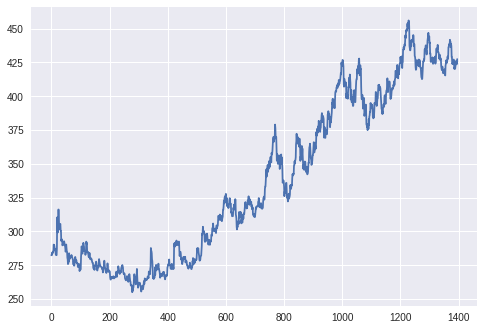

In [90]:
gold_price.plot()


We can see that gold had a long period of decrease in 2000



ACF Plot

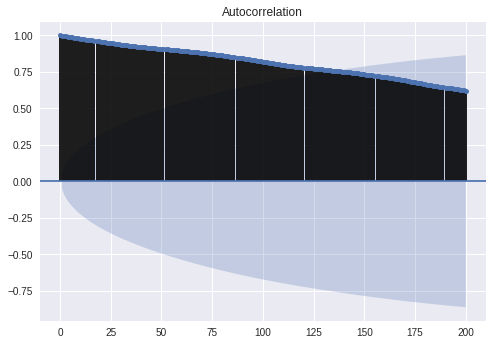

In [112]:
plot_acf(gold_price, lags = 200)
pyplot.show()

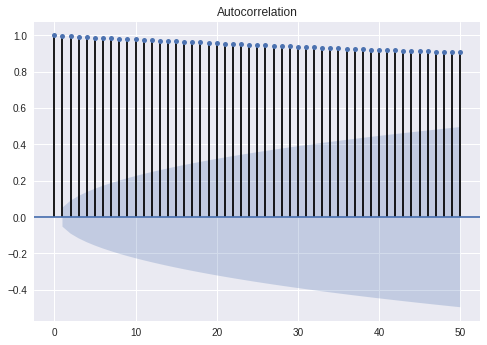

In [103]:
plot_acf(gold_price, lags = 50)
pyplot.show()

PACF Plot

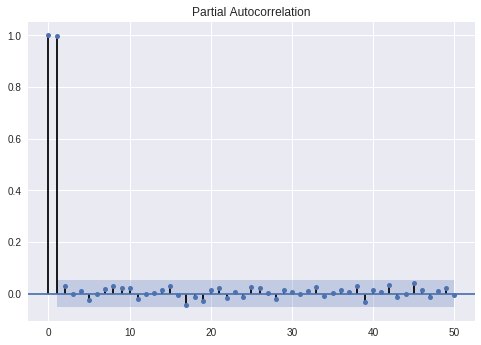

In [106]:
plot_pacf(gold_price, lags = 50)
pyplot.show()

## Corn Price

In [0]:
corn_price = concat_clean['Last_corn']

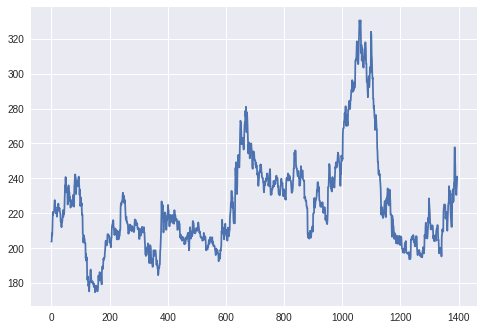

In [96]:
corn_price.plot()

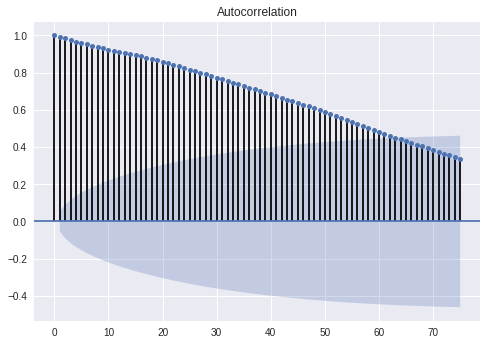

In [114]:
plot_acf(corn_price, lags = 75)
pyplot.show()

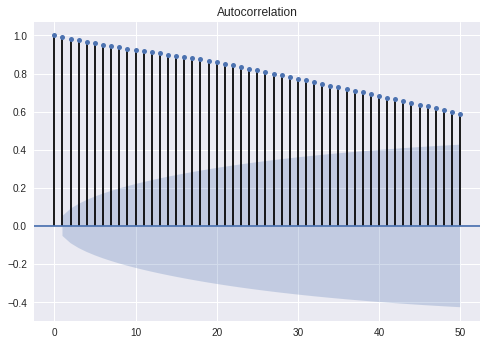

In [107]:
plot_acf(corn_price, lags = 50)
pyplot.show()

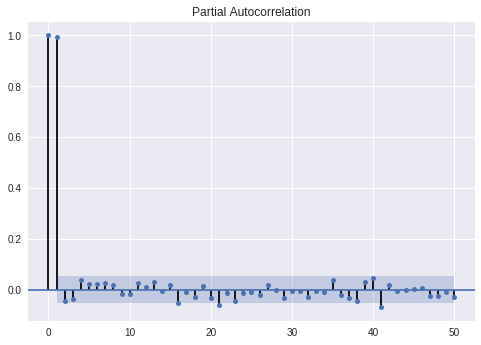

In [108]:
plot_pacf(corn_price, lags = 50)
pyplot.show()

## Looking at correlation between Gold Price and External Factors

Text(0.5,1,'Gold Price vs Corn Price')

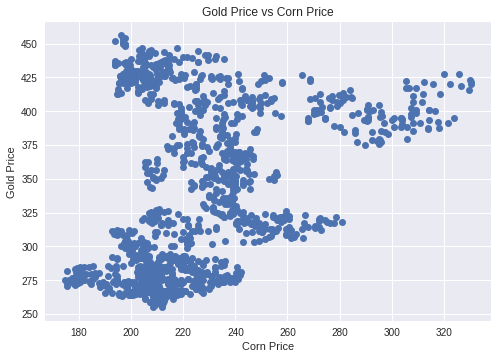

In [136]:
points = pyplot.scatter(corn_price, gold_price, lw=0 )
pyplot.ylabel('Gold Price')
pyplot.xlabel('Corn Price')
pyplot.title('Gold Price vs Corn Price')
#pyplot.colorbar(points)



Text(0.5,1,'Gold Price vs GDP')

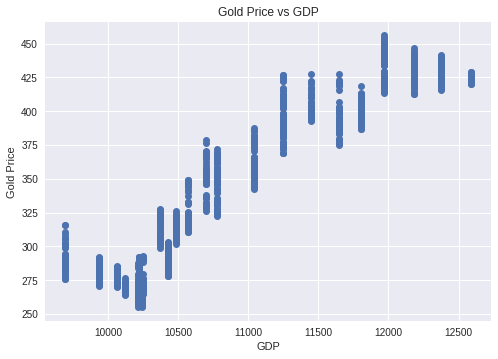

In [135]:
points = pyplot.scatter(gdp, gold_price, lw=0 )
pyplot.ylabel('Gold Price')
pyplot.xlabel('GDP')
pyplot.title('Gold Price vs GDP')
#pyplot.colorbar(points)



Text(0.5,1,'Gold Price vs CPI')

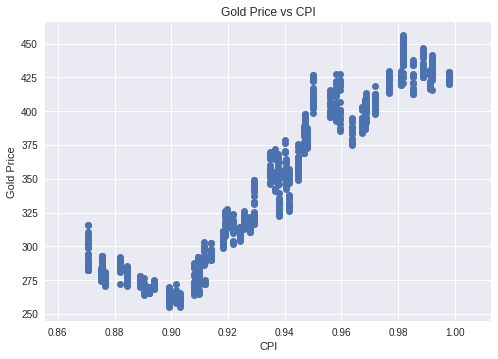

In [133]:
points = pyplot.scatter(cpi, gold_price, lw=0 )
pyplot.ylabel('Gold Price')
pyplot.xlabel('CPI')
pyplot.title('Gold Price vs CPI')
#pyplot.colorbar(points)


Text(0.5,1,'Gold Price vs Interest Rate')

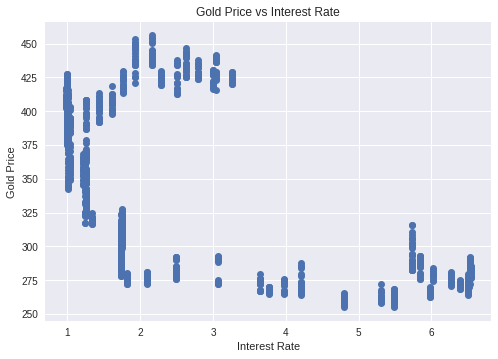

In [138]:
points = pyplot.scatter(interest, gold_price, lw=0 )
pyplot.ylabel('Gold Price')
pyplot.xlabel('Interest Rate')
pyplot.title('Gold Price vs Interest Rate')
#pyplot.colorbar(points)


We can see some sort of negative correlation between interest rate and gold prices

Text(0.5,1,'Gold Price vs Net Trade')

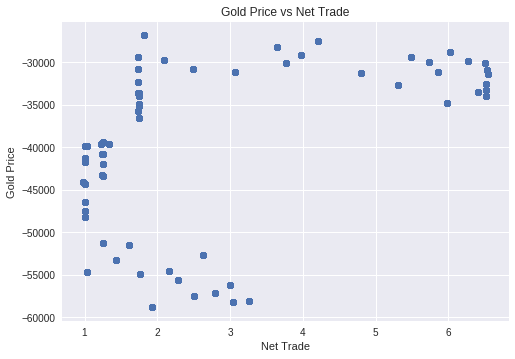

In [141]:
points = pyplot.scatter(interest, trade, lw=0 )
pyplot.ylabel('Gold Price')
pyplot.xlabel('Net Trade')
pyplot.title('Gold Price vs Net Trade')

Text(0.5,1,'Gold Price vs Temperature in Chicago')

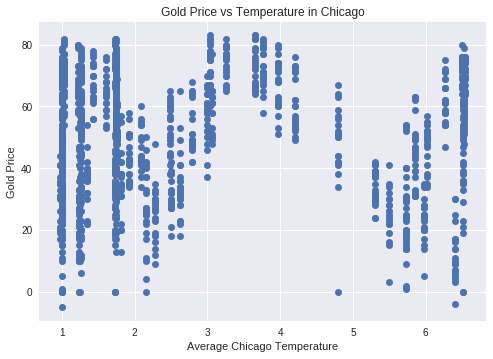

In [142]:
points = pyplot.scatter(interest, tmp, lw=0 )
pyplot.ylabel('Gold Price')
pyplot.xlabel('Average Chicago Temperature')
pyplot.title('Gold Price vs Temperature in Chicago')

# Other factors of interest not included in data

Strength of currency (exchange rate): We can see an inverse correlation between the price of gold and USD Index (https://www.macrotrends.net/1335/dollar-vs-gold-comparison-last-ten-years)


Volatility (VIX): There may be correlation between the market volatility and the price of Gold. Gold is typically seen as a hedge against uncertainty, so when uncertainty in the markets is high, people tend to put more money in gold 


Inflation Rate:  Similar to volatility, gold can be a hedge against rising inflation rates

Other Commodities: Other minerals such as Silver, Copper, and others can be closely related to the movement of Gold, as they tend to play a similar role in a portfolio. They may be more correlated with the movement of Gold than Corn



---

## Correlation Coefficient between various factors and price of Gold

![alt text](https://i.imgur.com/1HoAJIZ.png)

Source: http://cs229.stanford.edu/proj2013/Potoski-PredictingGoldPrices.pdf